In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
n_clusters_birch = 5
threshold_birch = 0.5
branching_factor_birch = 50 
birch_model = Birch(n_clusters=n_clusters_birch,
                    threshold=threshold_birch,
                    branching_factor=branching_factor_birch)

In [5]:
labels_birch = birch_model.fit_predict(X_scaled)
supervised = dataset.copy()
supervised['Cluster_group'] = labels_birch

In [6]:
supervised.to_csv("cluster_birch.csv", index=False)
print("Cluster labels assigned and saved to cluster_birch.csv")

Cluster labels assigned and saved to cluster_birch.csv


In [7]:
unique_labels = np.unique(labels_birch)
actual_n_clusters = len(unique_labels)

In [8]:
print(f"\nNumber of clusters (BIRCH): {actual_n_clusters}")
print(f"BIRCH parameters used: n_clusters={n_clusters_birch}, threshold={threshold_birch}, branching_factor={branching_factor_birch}")


Number of clusters (BIRCH): 5
BIRCH parameters used: n_clusters=5, threshold=0.5, branching_factor=50


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


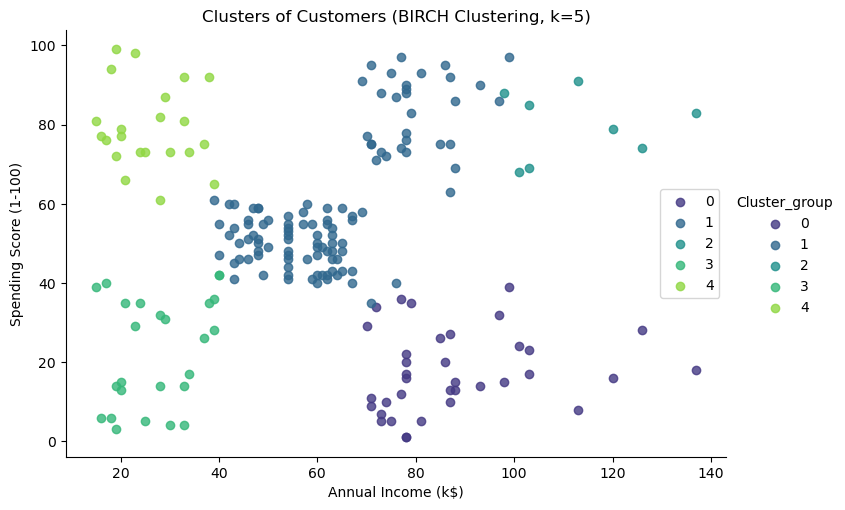

In [9]:
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5],
                   fit_reg=False, legend=True, legend_out=True, palette='viridis', aspect=1.5)

plt.title(f'Clusters of Customers (BIRCH Clustering, k={actual_n_clusters})')
plt.xlabel(supervised.columns[3])
plt.ylabel(supervised.columns[4])
plt.legend()
plt.show()